# MTH574 Project "Machine Learning Using Regression Model"

In [1]:
import graphlab   # use graphlab instead of pandas

# Load house data

In [2]:
sales = graphlab.SFrame('us_house.csv')     
# SFrame is a data structure for representing tabular in graphlab, same like pandas_read
# Dataset downloaded from kaggle

This non-commercial license of GraphLab Create for academic use is assigned to yhuo@umassd.edu and will expire on October 19, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\yanra\AppData\Local\Temp\graphlab_server_1512419058.log.0


Finished parsing file C:\Users\yanra\Desktop\MTH574\us_house.csv

Parsing completed. Parsed 100 lines in 0.138091 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,str,float,long,float,long,long,float,long,long,long,long,long,long,long,long,long,float,float,long,long]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file C:\Users\yanra\Desktop\MTH574\us_house.csv

Parsing completed. Parsed 21613 lines in 0.062539 secs.

In [3]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view
7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0
5631500400,20150225T000000,180000.0,2,1.0,770,10000,1.0,0,0
2487200875,20141209T000000,604000.0,4,3.0,1960,5000,1.0,0,0
1954400510,20150218T000000,510000.0,3,2.0,1680,8080,1.0,0,0
7237550310,20140512T000000,1225000.0,4,4.5,5420,101930,1.0,0,0
1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0
2008000270,20150115T000000,291850.0,3,1.5,1060,9711,1.0,0,0
2414600126,20150415T000000,229500.0,3,1.0,1780,7470,1.0,0,0
3793500160,20150312T000000,323000.0,3,2.5,1890,6560,2.0,0,0


# Data visualiation

In [4]:
graphlab.canvas.set_target('ipynb')
sales.show(view = "Scatter Plot",x = "sqft_living",y="price") #X axis is the square feet of the house, Y axis is the price.

# Create a simple regression model of sqft_living to price

In [5]:
train_data,test_data = sales.random_split(.8,seed=0) # split into training data and test data

# Build the regression model

In [6]:
sqft_model = graphlab.linear_regression.create(train_data, target='price', 
                                               features=['sqft_living'],
                                               validation_set=None)
# going to create a linear regression model called sqft_model using newton's method, 
#graphlab chose the default algorithm "newton's method"

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 1.012603     | 4349521.915863     | 262943.613519 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

# Evaluate the model

In [7]:
print (test_data['price'].mean())

543054.043036


In [75]:
sqft_model.predict(test_data).mean()

539179.6251832496

In [8]:
print (sqft_model.evaluate(test_data))

{'max_error': 4143550.874517018, 'rmse': 255191.02748709588}


# Prediction

In [9]:
import matplotlib.pyplot as plt# just do some plot in python
%matplotlib inline           

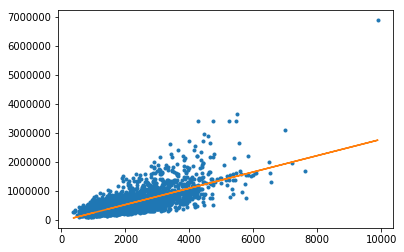

In [10]:
plt.plot(test_data['sqft_living'],test_data['price'],'.',     # X-axis as sqft_living, Y-axis as price
        test_data['sqft_living'],sqft_model.predict(test_data),'-') # Y-what the model predicted for each one of those house

# Show some other features

In [85]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode', 'yr_built']

In [86]:
sales[my_features].show() # A visualization of these features

In [87]:
sales.show(view='BoxWhisker Plot', x='zipcode', y='price') # the realationship between the location and price

# Build a regression model with more features

In [88]:
my_features_model = graphlab.linear_regression.create(train_data,
                                                      target='price',
                                                      features=my_features)
#my_features_model = graphlab.linear_regression.create(train_data, target='price',
#                                                      features = my_features)


PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16488

Number of features          : 7

Number of unpacked features : 7

Number of coefficients    : 8

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.039862     | 3891402.930742     | 1891564.393972       | 246284.801639 | 230013.357343   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

In [117]:
print my_features

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode', 'yr_built']


In [90]:
print sqft_model.evaluate(test_data)
print my_features_model.evaluate(test_data)

{'max_error': 4143550.874517018, 'rmse': 255191.02748709588}
{'max_error': 3817427.877139342, 'rmse': 241191.07797293027}


# Predict different house price

In [91]:
house1 = sales[0] # select a certion house, predict the price of this house, in this case, I selected the first row 

<img src = 'cheap house.jpg'>

In [92]:
house1

{'bathrooms': 1.0,
 'bedrooms': 3,
 'condition': 3,
 'date': '20141013T000000',
 'floors': 1.0,
 'grade': 7,
 'id': 7129300520,
 'lat': 47.5112,
 'long': -122.257,
 'price': 221900.0,
 'sqft_above': 1180,
 'sqft_basement': 0,
 'sqft_living': 1180,
 'sqft_living15': 1340,
 'sqft_lot': 5650,
 'sqft_lot15': 5650,
 'view': 0,
 'waterfront': 0,
 'yr_built': 1955,
 'yr_renovated': 0,
 'zipcode': 98178}

In [93]:
print house1['price']

221900.0


In [94]:
print sqft_model.predict(house1)

[285596.24128161964]


In [95]:
print my_features_model.predict(house1)

[244792.8240339635]


In [96]:
house2 = sales[10]

In [97]:
house2

{'bathrooms': 2.5,
 'bedrooms': 3,
 'condition': 3,
 'date': '20150403T000000',
 'floors': 1.0,
 'grade': 8,
 'id': 1736800520,
 'lat': 47.6007,
 'long': -122.145,
 'price': 662500.0,
 'sqft_above': 1860,
 'sqft_basement': 1700,
 'sqft_living': 3560,
 'sqft_living15': 2210,
 'sqft_lot': 9796,
 'sqft_lot15': 8925,
 'view': 0,
 'waterfront': 0,
 'yr_built': 1965,
 'yr_renovated': 0,
 'zipcode': 98007}

<img src="rich house.jpg">

In [98]:
print(house2["price"])

662500.0


In [99]:
print sqft_model.predict(house2)

[956655.9272057577]


In [100]:
print my_features_model.predict(house2) # we can see my_features model gave a worse predict

[1049507.7094005924]


In [101]:
my_hosue= {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':[98039], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

<img src = "my house.jpg">

In [102]:
print my_features_model.predict(graphlab.SFrame(my_hosue))

[16604529.169160655]


In [103]:
import seaborn as sns

In [104]:
my_features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'zipcode',
 'yr_built']

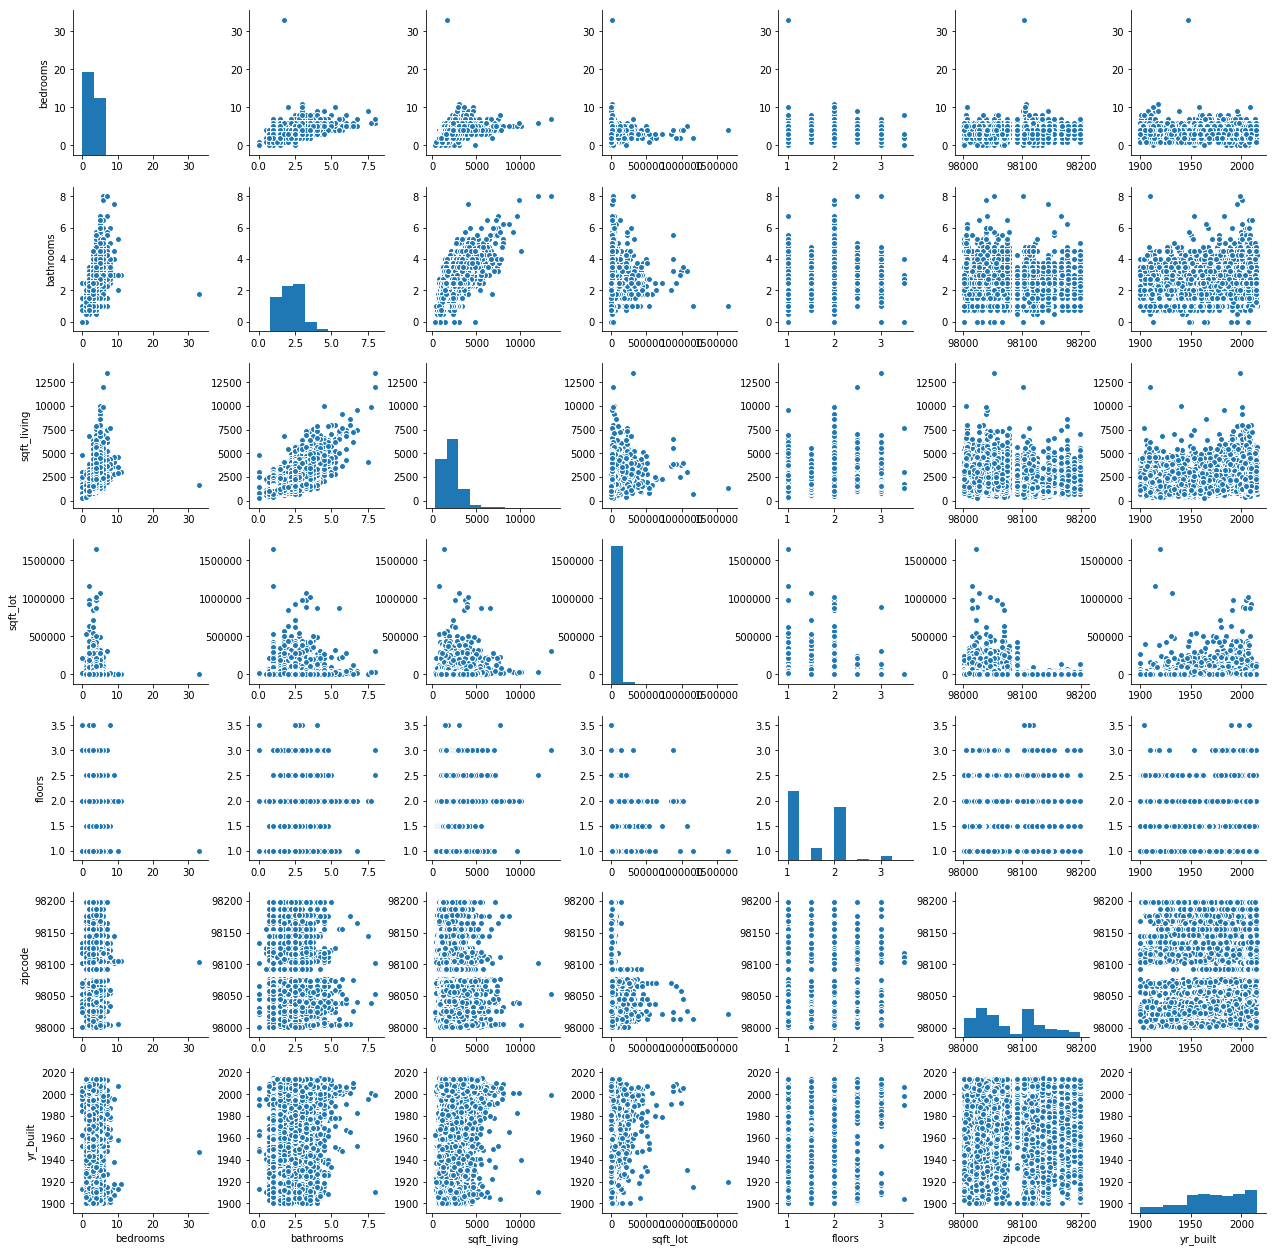

In [105]:
import pandas as pd
df = pd.read_csv('us_house.csv')
sns.pairplot(df[my_features])

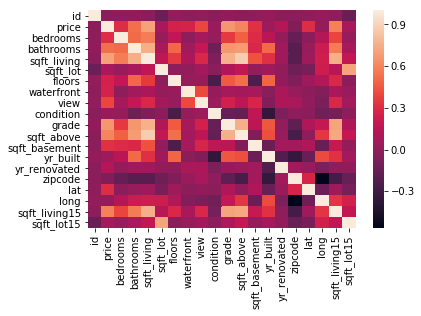

In [106]:
sns.heatmap(df.corr())

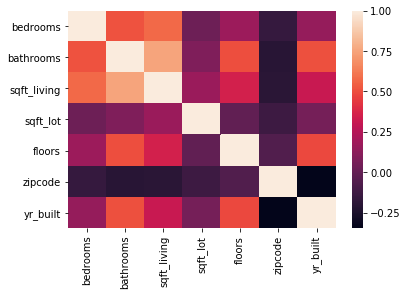

In [107]:
sns.heatmap(df[my_features].corr())

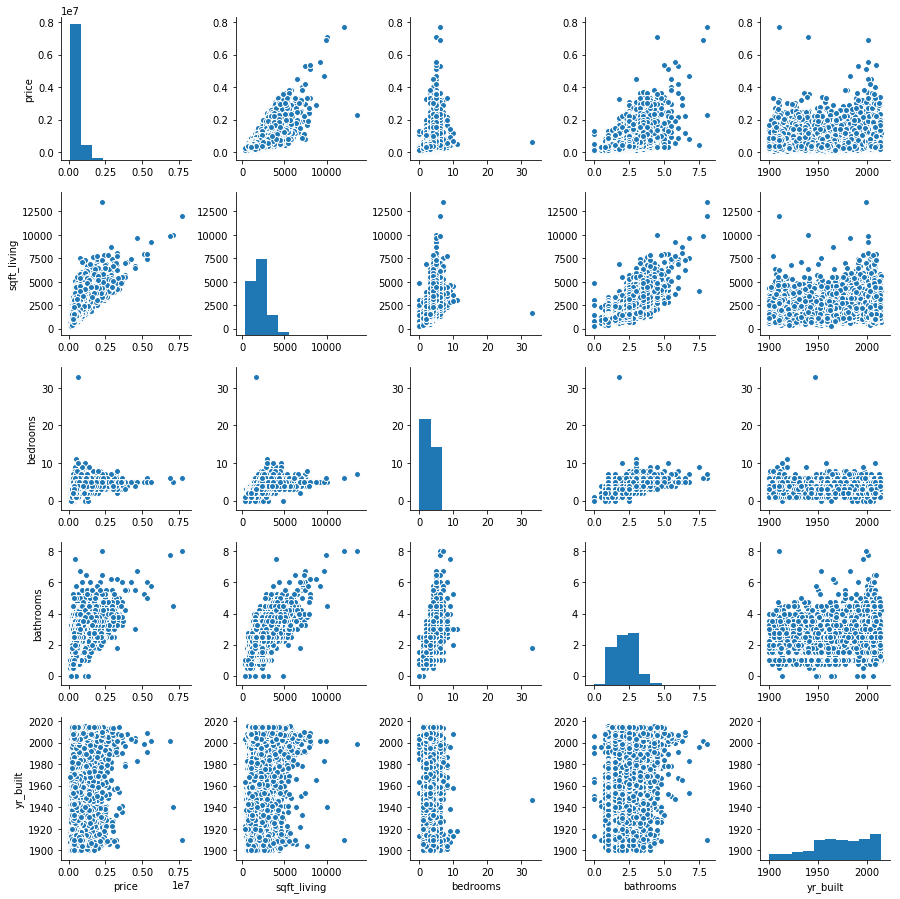

In [108]:
feature = ['price', 'sqft_living', 'bedrooms', 'bathrooms', 'yr_built']
sns.pairplot(df[feature])

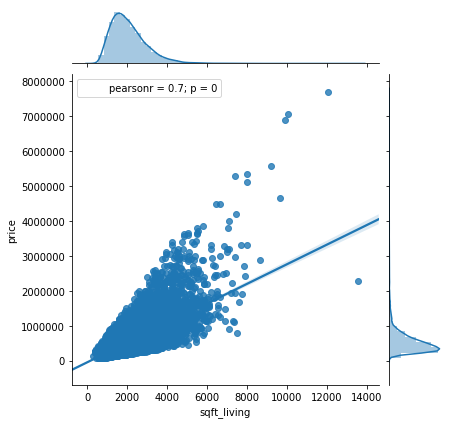

In [109]:
sns.jointplot(df['sqft_living'], df['price'], kind="reg")

In [110]:
print df.columns

Index([u'id', u'date', u'price', u'bedrooms', u'bathrooms', u'sqft_living',
       u'sqft_lot', u'floors', u'waterfront', u'view', u'condition', u'grade',
       u'sqft_above', u'sqft_basement', u'yr_built', u'yr_renovated',
       u'zipcode', u'lat', u'long', u'sqft_living15', u'sqft_lot15'],
      dtype='object')


In [111]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [112]:
len(df.columns)

21

In [113]:
len(df)

21613

In [114]:
df.count()

id               21613
date             21613
price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64

In [115]:
my_features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'zipcode',
 'yr_built']

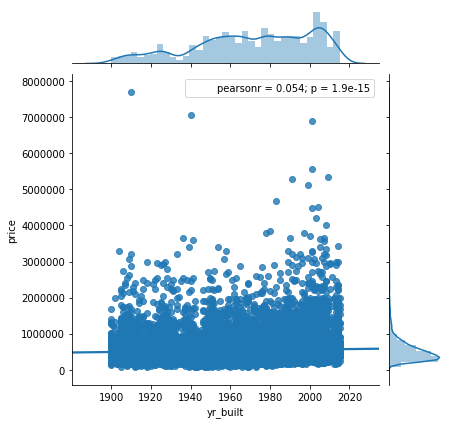

In [116]:
sns.jointplot(df['yr_built'], df['price'], kind="reg")